Questions answered in this analysis:

(1) what are the most and least common ways to learn how to code in each age group?

(2) what are the most used platforms to learn how to code

(3) can we predict DevType?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('./stack_overflow_2023/survey_results_public.csv')

In [2]:
df.shape

(89184, 84)

In [3]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [4]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [5]:
# this piece of code was taken then from previous parts of the course the modified
# From: 'Project: Writing a Data Scientist Blog Post. Udacity, Nanodegree in Data Scientist'

def total_count(df, col1_name, col2_name, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1_name - the column name you want to look through
    col2_name - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    group_col - a column used to group the results

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    
    #loop through list
    for value in look_for:
        #loop through rows
        for i in range(df.shape[0]):
            #if the value is in the row, add one
            if value in df[col1_name][i]:
                new_df[value] += int(df[col2_name][i])
                    
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1_name, col2_name]
    new_df.sort_values(col2_name, ascending=False, inplace=True)
    return new_df


def clean_and_plot(df, col1_name, col2_name, possible_values, title, chartType):
    '''
    INPUT 
        df - a dataframe holding the columns to clean and plot
        col1_name - the column name you want to look through
        col2_name - the column you want to count values from
        group_col - a column used to group the results
        title - string the title of your plot
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    
    study_df = total_count(df, col1_name, col2_name, possible_values)

    study_df.set_index('method', inplace=True)
    
    
    if chartType == 'Pie':
        colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']
        
        study_df.plot(kind='pie', y='count', legend=None, autopct='%1.1f%%', colors = colors, labels = None)
        
        plt.legend(study_df.index, loc="center left", bbox_to_anchor=(1, 0.5), title='Method', labelcolor=colors)
        plt.title(title)
        plt.show()
        
    elif chartType == 'bar':
        study_df.plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    
    else:
        raise Exception("chartType can only be either Pie or bar")
        
    return study_df

# Question 1:
***What are the most and least common ways to learn how to code in each age group?***

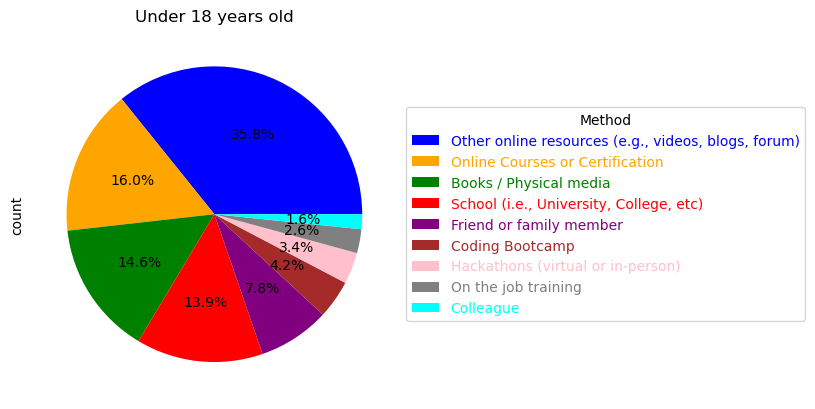

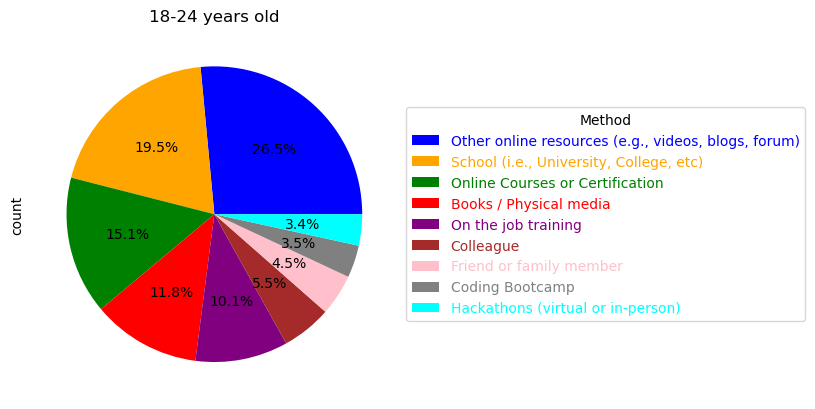

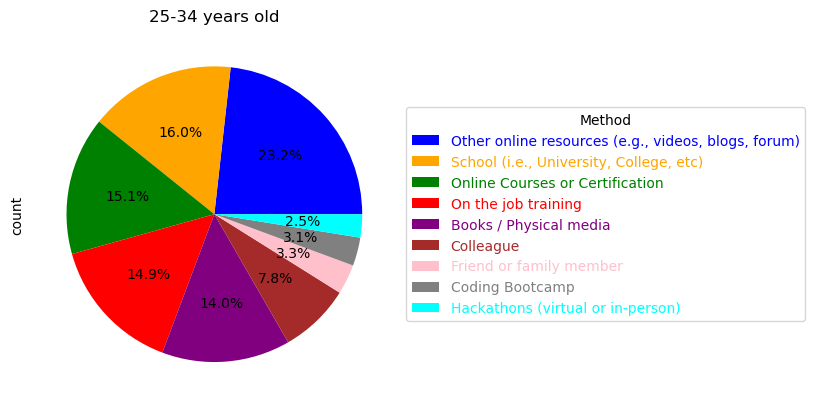

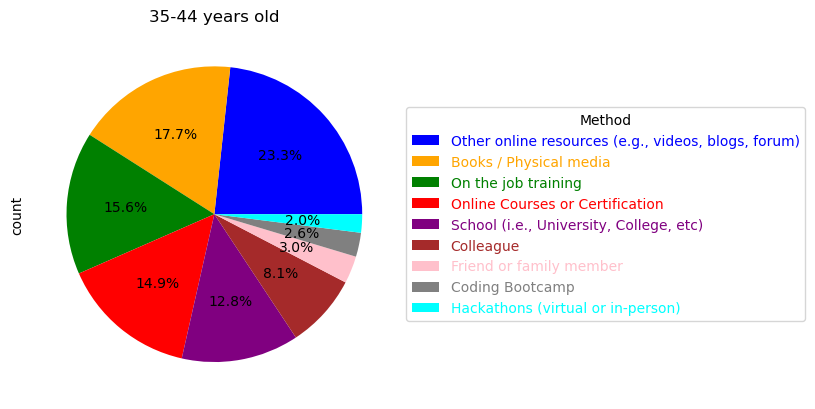

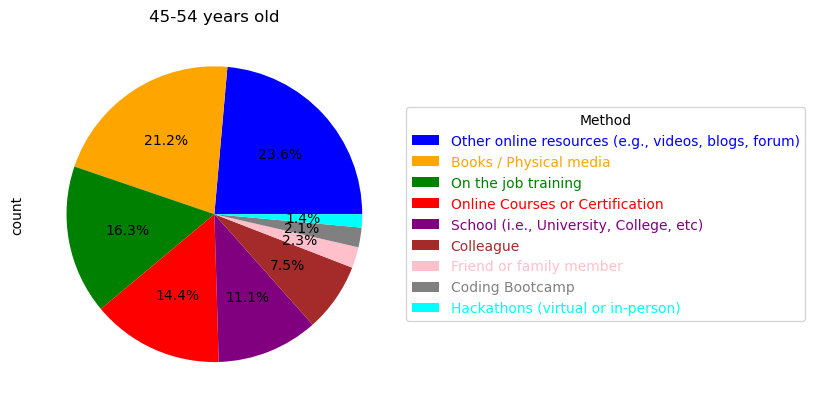

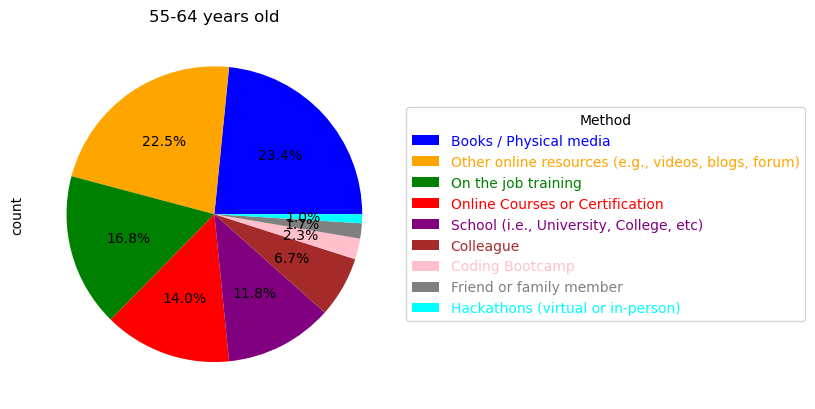

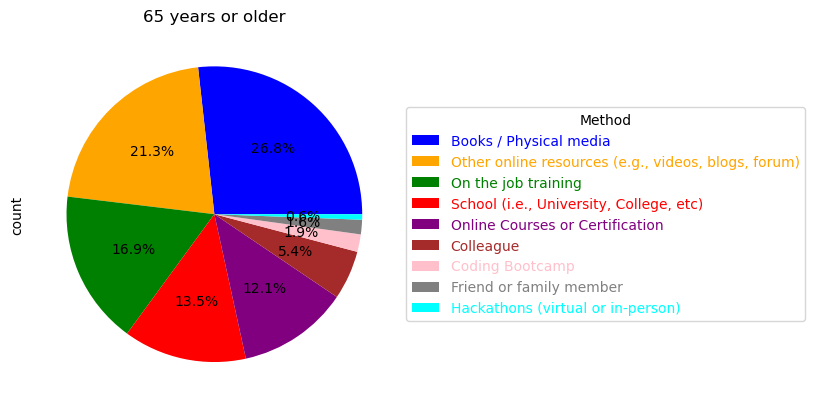

In [6]:
learn_to_code_possible_values = [
    'Books / Physical media',
    'Coding Bootcamp',
    'Colleague',
    'Friend or family member',
    'Hackathons (virtual or in-person)',
    'Online Courses or Certification',
    'On the job training',
    'Other online resources (e.g., videos, blogs, forum)',
    'School (i.e., University, College, etc)',
]

age_groups = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
]

# loop through the diffrent age groups and make a plot for each of them
for group in age_groups:
    # get the needed data from the df and filter it to remove any unhelpful values
    learn_to_code_df = df.groupby(['LearnCode', 'Age']).size().reset_index(name='count')
    learn_to_code_df.rename(columns={'LearnCode': 'method'}, inplace=True)
    learn_to_code_df = learn_to_code_df[learn_to_code_df['method'] != 'Other (please specify):']
    learn_to_code_df = learn_to_code_df[learn_to_code_df['Age'] == group].reset_index(drop=True)
    learn_to_code_df.dropna(inplace=True)
    
    # plot the data
    learn_to_code_df = clean_and_plot(learn_to_code_df, 'method', 'count', learn_to_code_possible_values, group, 'Pie')
    
    #print a couple of empty lines between each group
    print('\n\n')
    

it can be seen from the charts above that the most common learning style is 'Other Online resources (e.g videos, blogs, forums)' for all individuals that are below 55 years old.

and for those 55 and above, 'books/physical media' is the most common style.


As for the least common learning method, 'hackathons (virtual or in-person)' consistinsly ranked number 1 in every age groups except for the 'below 18' group, as they had 'colleage' and 'on the job training' in the least 2 common styles which is expected since the majority of them would still be in school (whether that be higher education or grade school).

# Question 2:

***what are the most used platforms to learn how to code?***

first, remove respondents who did not answer the question

In [7]:
platform = df.dropna(subset={'LearnCodeCoursesCert'})

next, remove all respondents who chose 'Other'

In [8]:
platform = platform[platform['LearnCodeCoursesCert'] != 'Other (please specify):']

now plot the results

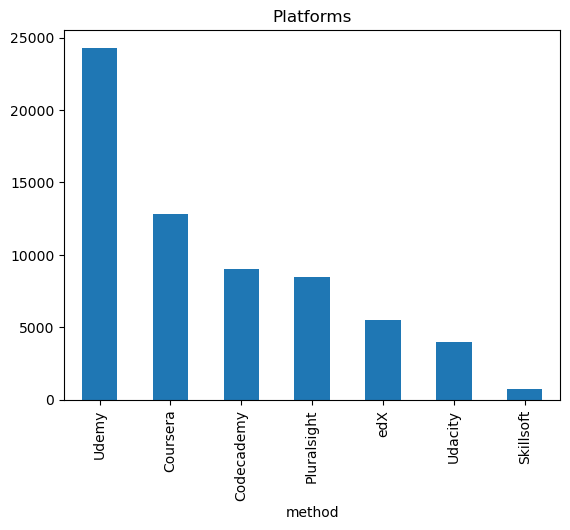

In [9]:
platforms_possible_values = [
    'Codecademy',
    'Coursera',
    'edX',
    'Pluralsight',
    'Skillsoft',
    'Udacity',
    'Udemy',
]

# make the data frame only have the 'LearnCodeCoursesCert' column and a second column for the number of times it appears
platform_df = platform['LearnCodeCoursesCert'].value_counts().reset_index()
platform_df.rename(columns={'LearnCodeCoursesCert': 'method'}, inplace=True)

# plot
platform_df = clean_and_plot(platform_df, 'method', 'count', platforms_possible_values, 'Platforms', 'bar')

In [10]:
platform_df['percentage'] = (platform_df['count'] / platform.shape[0]) * 100
platform_df

,count,percentage
method,,
Udemy,24296,65.530262
Coursera,12836,34.620779
Codecademy,9015,24.314921
Pluralsight,8463,22.826087
edX,5536,14.931492
Udacity,3992,10.767073
Skillsoft,754,2.033661


You can see from the 2 charts above that Udemy cerificates are the most popular among all respondents 

# Question 3:
***can we predict DevType?***

split all catagorical features that contain multiple values to have 1 possible value in each feature

In [11]:
multiple_values_features = [
    'Employment',
    'CodingActivities',
    'LearnCode',
    'LearnCodeOnline',
    'LearnCodeCoursesCert',
    'BuyNewTool',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith',
    'DatabaseWantToWorkWith',
    'PlatformHaveWorkedWith',
    'PlatformWantToWorkWith',
    'MiscTechHaveWorkedWith',
    'MiscTechWantToWorkWith',
    'ToolsTechHaveWorkedWith',
    'ToolsTechWantToWorkWith',
    'NEWCollabToolsHaveWorkedWith',
    'NEWCollabToolsWantToWorkWith',
    'OpSysPersonal use',
    'OpSysProfessional use',
    'OfficeStackAsyncHaveWorkedWith',
    'OfficeStackAsyncWantToWorkWith',
    'OfficeStackSyncHaveWorkedWith',
    'OfficeStackSyncWantToWorkWith',
    'AISearchHaveWorkedWith',
    'AISearchWantToWorkWith',
    'AIDevHaveWorkedWith',
    'AIDevWantToWorkWith',
    'NEWSOSites',
    'AIToolInterested in Using',
    'AIToolCurrently Using',
    'AIToolNot interested in Using',
    'AINextVery different',
]


for value in multiple_values_features:
    
    df_split = df[value].str.get_dummies(sep=';')

    # Concatenate the new DataFrame with the original DataFrame
    df = pd.concat([df, df_split], axis=1)

    # Drop the original 'letter' column if needed
    df = df.drop(columns=[value])
df

,ResponseId,Q120,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,...,Collaborating with teammates,Committing and reviewing code,Debugging and getting help,Deployment and monitoring,Documenting code,Learning about a codebase,Other (please describe),Project planning,Testing code,Writing code
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,I agree,I am a developer by profession,25-34 years old,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,...,0,0,0,0,0,0,0,0,0,0
2,3,I agree,I am a developer by profession,45-54 years old,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end","5,000 to 9,999 employees",...,0,0,0,0,0,0,0,0,0,0
3,4,I agree,I am a developer by profession,25-34 years old,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",100 to 499 employees,...,0,0,0,0,0,0,0,0,0,0
4,5,I agree,I am a developer by profession,25-34 years old,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",20 to 99 employees,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,Remote,"Associate degree (A.A., A.S., etc.)",20,5,"Developer, front-end",100 to 499 employees,...,0,0,0,0,0,0,0,0,0,0
89180,89181,I agree,I am a developer by profession,18-24 years old,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,NaN,"Developer, back-end",NaN,...,0,0,0,0,0,0,0,0,0,0
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,NaN,Something else,10,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",3,NaN,System administrator,NaN,...,0,0,0,0,0,0,0,0,0,0


remove rows with more than 85% nan values, and remove DevType from the dataframe

In [12]:
# remove all rows missing an answer to DevType
new_df = df.dropna(subset=['DevType'])

# remove all rows with more than 85% of it's values missing
new_df = new_df.dropna(thresh=len(new_df.columns)*(0.85), axis=0)

# encode any catagorical feature that has not been converted to a numerical feature yet. Except the 'DevType' feature
catagorical_features = new_df.select_dtypes(include=['object'])

for feature in catagorical_features.columns:
    new_df[feature] = LabelEncoder().fit_transform(new_df[feature])
            

y = new_df['DevType']


#fill the remaining nan values
fill_mean = lambda col: col.fillna(col.mean())
new_df.drop('DevType', axis = 1, inplace=True)
new_df = new_df.apply(fill_mean, axis=0)

X = new_df

brake the data into a training and testing sets

In [13]:
# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= .25, random_state=42)

model

In [14]:
# initilize the model
logreg = LogisticRegression(random_state = 40, max_iter=1500)

# fit the model
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

print("Accuracy of the Logistic Regression predictor is:" + str(metrics.accuracy_score(y_test, y_pred)) + '\n\n')

Accuracy of the Logistic Regression predictor is:0.49703403059631596




In [15]:
np.random.seed(40)

# initilize the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

#the accurecy
print("Accuracy of the KNN predictor with k=3:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the KNN predictor with k=3:0.30533874492663127


Try to find a better result using a diffrent k

Text(0, 0.5, 'Testing Accuracy')

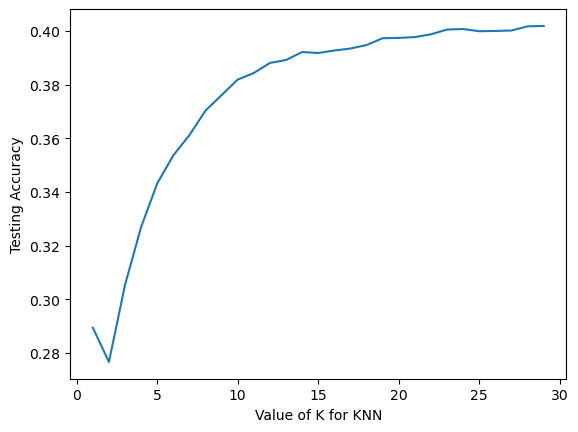

In [16]:
k_range = range(1, 30)

scores = []

# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [17]:
# initilize the model
knn = KNeighborsClassifier(n_neighbors=28)

# fit the model
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

#the accurecy
print("Accuracy of the KNN predictor with k=28:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the KNN predictor with k=28:0.40170673327089185


The best accuracy was 49.7% using the regression model.

This accuracy is considred to be "bad" since in most cases, the model is unable to predict the DevType of a responder using their responses to other questions.

This could be aresult of 2 things:

(1) The model has too many features, so it's loosing some accuracy due to some irrelevant features

(2) the survey questions do not capture the data needed to be able to make the prediction